In [15]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.datasets import cifar10
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Cargar y preprocesar los datos
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [6]:
train_images, test_images = train_images/255, test_images/255

In [3]:
nRows, nCols, nDims = train_images.shape[1:]
input_shape = (nRows, nCols, nDims)

train_data = train_images.astype('float32') / 255
test_data = test_images.astype('float32') / 255

In [4]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
print('Total number of outputs : ', len(np.unique(train_labels)))
print('Output classes : ', np.unique(train_labels))

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


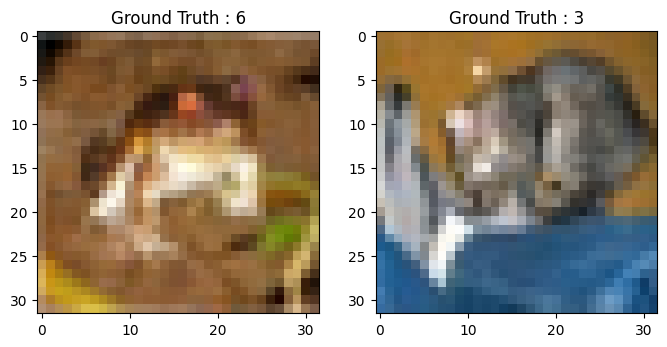

In [5]:
# Mostrar las primeras imágenes
plt.figure(figsize=[8, 4])
plt.subplot(121)
plt.imshow(train_images[0])
plt.title("Ground Truth : {}".format(train_labels[0][0]))

plt.subplot(122)
plt.imshow(test_images[0])
plt.title("Ground Truth : {}".format(test_labels[0][0]))
plt.show()

In [6]:
# Crear el modelo CNN mejorado
def createModel():
    model = Sequential()
    
    # Primera capa convolucional
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Segunda capa convolucional
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Tercera capa convolucional
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    # Aplanar y agregar capas densas
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(np.unique(train_labels)), activation='softmax'))
    
    return model

In [7]:
# Inicializar el modelo
model = createModel()

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\acer\OneDrive - Universidad del Valle de Guatemala\Documentos\GitHub\Lab3DeepLearning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Definir callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [9]:
# Entrenar el modelo
history = model.fit(train_data,
                    train_labels_one_hot,
                    batch_size=64,
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr],
                    verbose=2)

Epoch 1/50
625/625 - 54s - 86ms/step - accuracy: 0.3898 - loss: 1.6785 - val_accuracy: 0.4868 - val_loss: 1.4086 - learning_rate: 0.0010
Epoch 2/50
625/625 - 52s - 83ms/step - accuracy: 0.5479 - loss: 1.2707 - val_accuracy: 0.5305 - val_loss: 1.3729 - learning_rate: 0.0010
Epoch 3/50
625/625 - 50s - 80ms/step - accuracy: 0.6129 - loss: 1.0952 - val_accuracy: 0.6574 - val_loss: 0.9856 - learning_rate: 0.0010
Epoch 4/50
625/625 - 48s - 78ms/step - accuracy: 0.6572 - loss: 0.9753 - val_accuracy: 0.6748 - val_loss: 0.9302 - learning_rate: 0.0010
Epoch 5/50
625/625 - 50s - 80ms/step - accuracy: 0.6868 - loss: 0.8973 - val_accuracy: 0.6923 - val_loss: 0.9232 - learning_rate: 0.0010
Epoch 6/50
625/625 - 50s - 81ms/step - accuracy: 0.7110 - loss: 0.8368 - val_accuracy: 0.7288 - val_loss: 0.7882 - learning_rate: 0.0010
Epoch 7/50
625/625 - 51s - 81ms/step - accuracy: 0.7288 - loss: 0.7853 - val_accuracy: 0.7364 - val_loss: 0.7535 - learning_rate: 0.0010
Epoch 8/50
625/625 - 51s - 82ms/step - ac

In [10]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_data, test_labels_one_hot, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 - 3s - 11ms/step - accuracy: 0.8471 - loss: 0.5032
Test accuracy: 0.8471


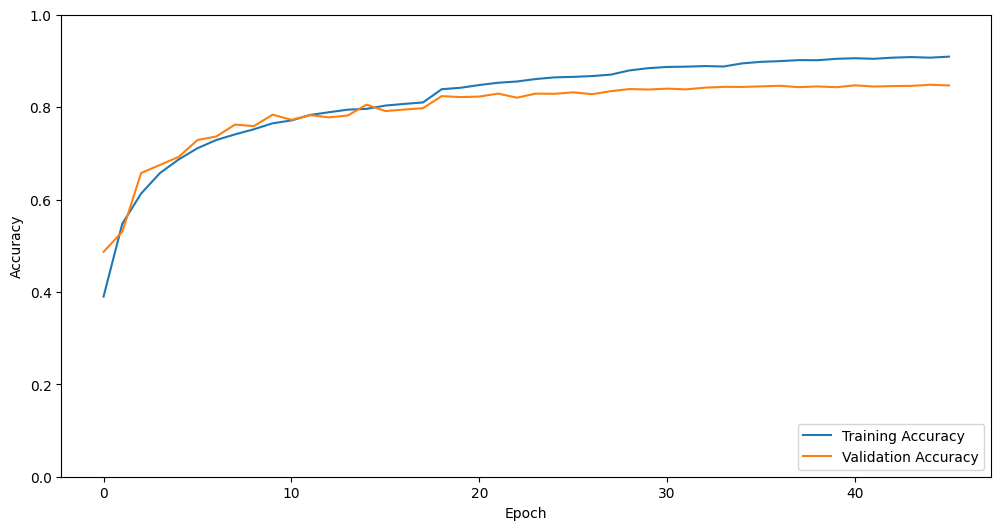

In [11]:
# Graficar el historial de entrenamiento
plt.figure(figsize=[12, 6])
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [16]:
# Predicciones y matriz de confusión
predictions = model.predict(test_data)
cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


<Figure size 1000x800 with 0 Axes>

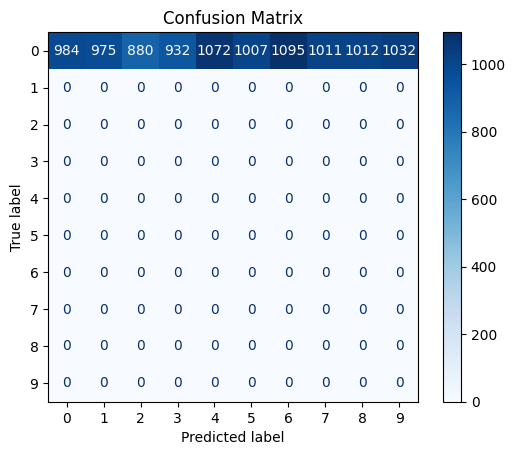

In [17]:
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cm, display_labels=np.arange(10)).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()